In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [60]:
### Importing Dataset

from sklearn.datasets import load_iris

In [61]:
iris = load_iris()

In [62]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [63]:
x = iris.data
y = iris.target

In [64]:
data = pd.DataFrame(x, columns = iris.feature_names)

data["Species"] = y

data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [65]:
data.shape

(150, 5)

In [66]:
data["Species"].value_counts()

0    50
1    50
2    50
Name: Species, dtype: int64

In [67]:
data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


<AxesSubplot:xlabel='Species', ylabel='count'>

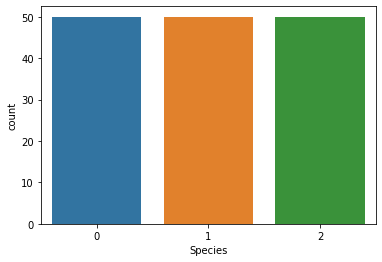

In [68]:
sns.countplot(data["Species"])

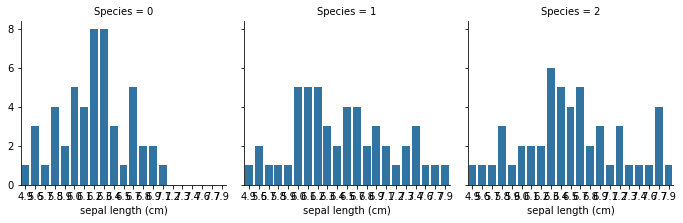

In [69]:
fig = sns.FacetGrid(data, col ="Species", size = 3.2, aspect = 1.0)
fig.map(sns.countplot, "sepal length (cm)")

In [70]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size = 0.2, random_state = 12)

In [71]:
xtrain.shape

(120, 4)

In [72]:
xtest.shape

(30, 4)

In [73]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

models = {"Logistic Regression" : LogisticRegression(),
         "SVC" : SVC(kernel = "rbf", gamma = 0.5, probability = True),
         "DecisionTreeClassifier" : DecisionTreeClassifier(max_depth = 2, random_state = 12),
          "GradientBoostingClassifier" : GradientBoostingClassifier(max_depth = 2, random_state = 14, n_estimators = 3, learning_rate=1.0)
         }

In [74]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

def loss(ytrue, ypred, retur = False):
    pre = precision_score(ytrue, ypred, average = "macro")
    rec = recall_score(ytrue, ypred, average ="macro")
    acc = accuracy_score(ytrue, ypred)
    
    if retur:
        return pre, rec, acc
    else:
        print(pre)
        print(rec)
        print(acc)

In [86]:
def train_and_eval(models, x, y):
    for name, model in models.items():
        print(name, ":")
        model.fit(xtrain,ytrain)
        loss(ytest, model.predict(xtest))
        print("*" * 70)

In [87]:
train_and_eval(models, xtrain, ytrain)

Logistic Regression :
0.9666666666666667
0.9629629629629629
0.9666666666666667
**********************************************************************
SVC :
0.9666666666666667
0.9629629629629629
0.9666666666666667
**********************************************************************
DecisionTreeClassifier :
0.8916666666666666
0.8888888888888888
0.9
**********************************************************************
GradientBoostingClassifier :
0.9259259259259259
0.9259259259259259
0.9333333333333333
**********************************************************************


In [89]:
lr = LogisticRegression()
lr.fit(xtrain, ytrain)
lr.predict([[1.3, 1.6, 1.3, 1.2]])

array([0])

In [91]:
import pickle
# open a file, where you ant to store the data
with open("model.pkl","wb") as f:
    pickle.dump(lr,f)